In [1]:
#Importation de données
evans <- read.table("http://web1.sph.emory.edu/dkleinb/allDatasets/datasets/evans.dat")
head(evans) 

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,21,0,0,56,270,0,0,80,138,0,0,0
2,31,0,0,43,159,1,0,74,128,0,0,0
3,51,1,1,56,201,1,1,112,164,1,1,201
4,71,0,1,64,179,1,0,100,200,1,1,179
5,74,0,0,49,243,1,0,82,145,0,0,0
6,91,0,0,46,252,1,0,88,142,0,0,0


In [2]:
names(evans) <- c("id","chd","cat","age","chl","smk","ecg","dbp","sbp","hpt","ch","cc")
head(evans) 

,id,chd,cat,age,chl,smk,ecg,dbp,sbp,hpt,ch,cc
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,21,0,0,56,270,0,0,80,138,0,0,0
2,31,0,0,43,159,1,0,74,128,0,0,0
3,51,1,1,56,201,1,1,112,164,1,1,201
4,71,0,1,64,179,1,0,100,200,1,1,179
5,74,0,0,49,243,1,0,82,145,0,0,0
6,91,0,0,46,252,1,0,88,142,0,0,0


# Régression logistique

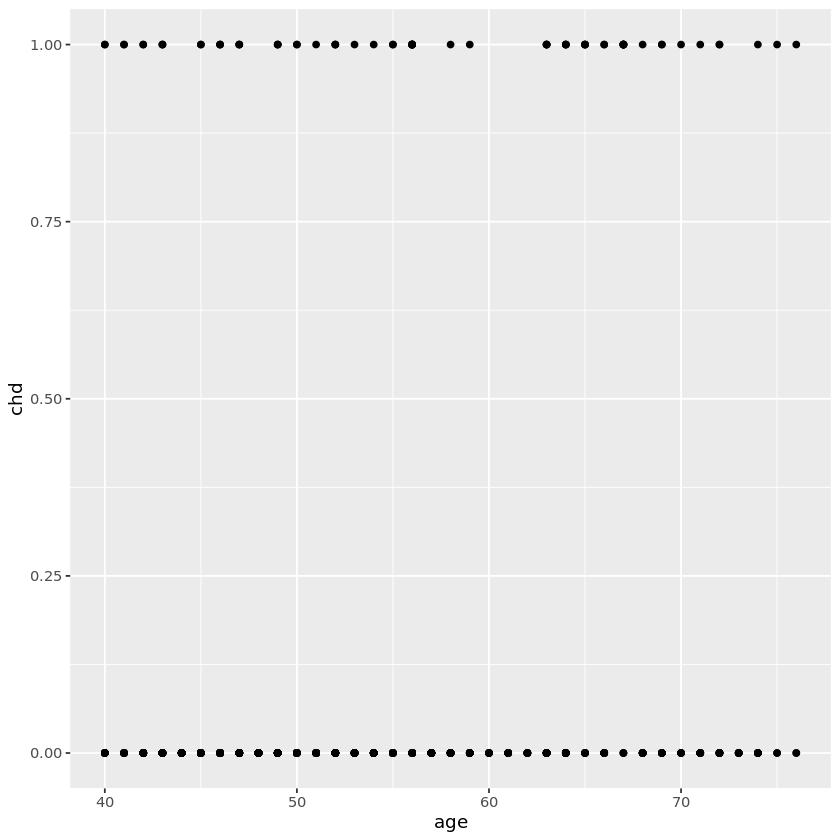

In [7]:
#Présenter les données 

#library(ggplot2)
#ggplot(data = evans) +
#    aes(x = age,
#        y = chd) +
#    geom_point()

plot(evans$age,evans$chd)

In [8]:
myreg=glm(chd~age, data = evans, family=binomial(link=logit))
summary(myreg)


Call:
glm(formula = chd ~ age, family = binomial(link = logit), data = evans)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7579  -0.5170  -0.4464  -0.3929   2.3518  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.47833    0.75610  -5.923 3.16e-09 ***
age          0.04445    0.01315   3.381 0.000723 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 438.56  on 608  degrees of freedom
Residual deviance: 427.22  on 607  degrees of freedom
AIC: 431.22

Number of Fisher Scoring iterations: 5


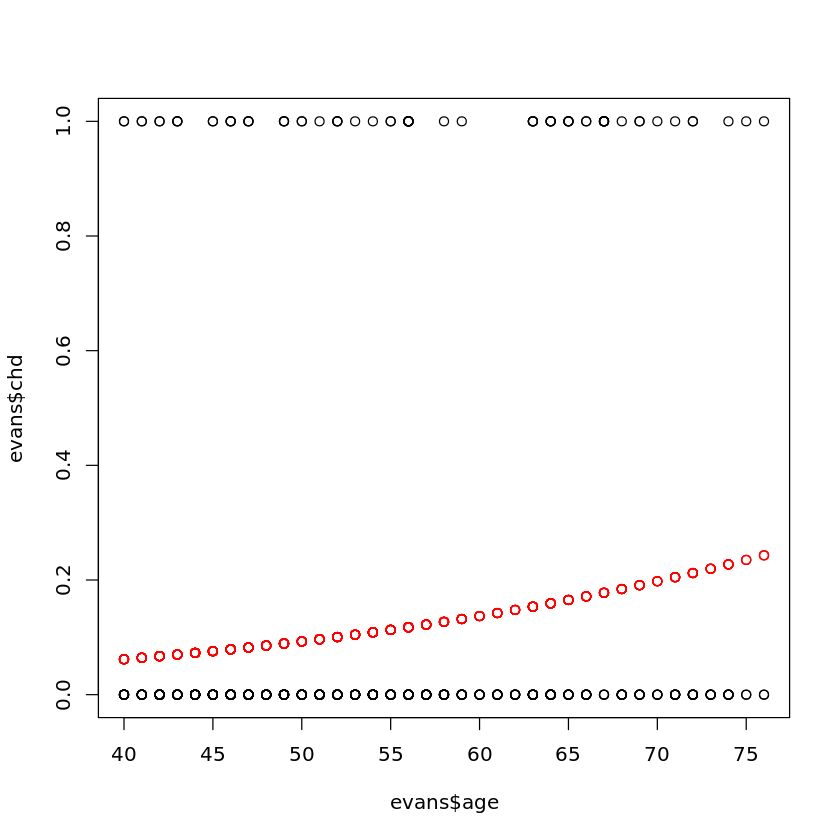

In [16]:
#logit(E(chd)) = 0,044 age -4,48

logit_ypredit=0.044* evans$age -4.48    
ypredit=exp(logit_ypredit)/(1+ exp(logit_ypredit)) # transfo inverse de logit

plot(evans$age,evans$chd)
points(evans$age,ypredit, col="red")

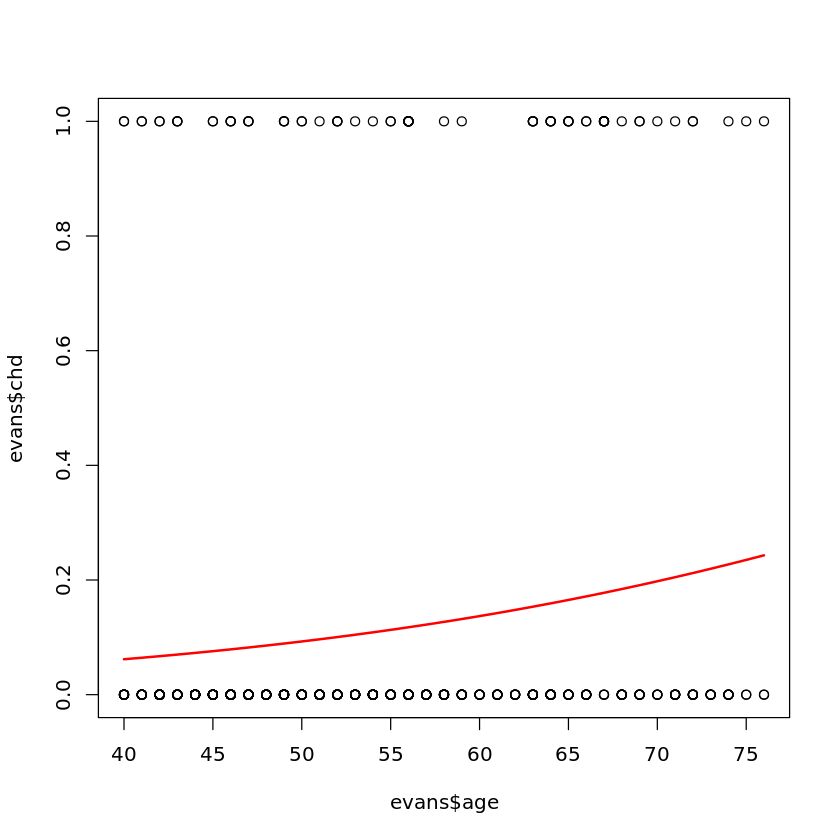

In [17]:
plot(evans$age,evans$chd)
o=order(evans$age)
points(evans$age[o],ypredit[o], col="red", type="l", lwd=2)

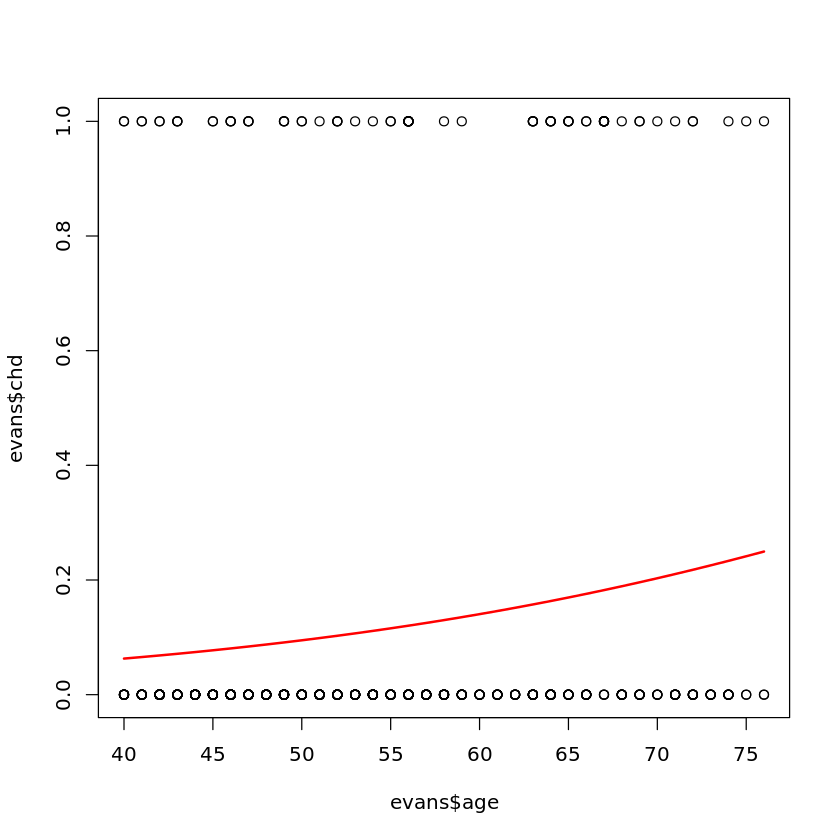

In [18]:
#Méthode plus simple 

plot(evans$age,evans$chd)
myreg=glm(evans$chd~evans$age, family=binomial(link=logit))
ypredit=myreg$fitted
o=order(evans$age)
points(evans$age[o],ypredit[o], col="red", type="l", lwd=2)

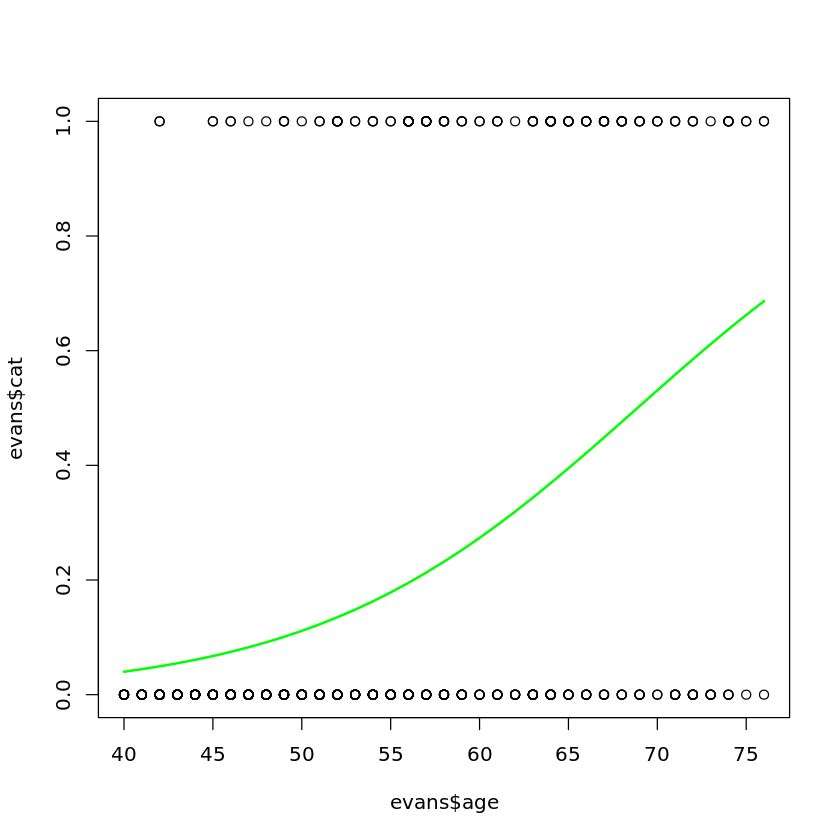

In [25]:

plot(evans$age,evans$cat)
myreg=glm(cat~age, data = evans, family=binomial(link=logit))
ypredit=myreg$fitted
o=order(evans$age)
points(evans$age[o],ypredit[o], col="green", type="l", lwd=2)


In [ ]:
chd = variable à expliquer binaire
age, chl, smk, ecg et hpt  = variables explicatives

In [24]:
#age, chl, smk, ecg et hpt sont les variables de contrôle et chd variable binaire à expliqeur.

myreg = glm(chd~age+smk+hpt, data = evans, family=binomial(link=logit))
summary(myreg)



Call:
glm(formula = chd ~ age + smk + hpt, family = binomial(link = logit), 
    data = evans)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9746  -0.5451  -0.4168  -0.3296   2.6239  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.37565    0.84445  -6.366 1.94e-10 ***
age          0.04368    0.01373   3.182  0.00146 ** 
smk          0.83567    0.30138   2.773  0.00556 ** 
hpt          0.72221    0.26613   2.714  0.00665 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 438.56  on 608  degrees of freedom
Residual deviance: 411.13  on 605  degrees of freedom
AIC: 419.13

Number of Fisher Scoring iterations: 5
